<a href="https://colab.research.google.com/github/NadiaSchmitz/fashionmnist/blob/master/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyse der Arbeit eines neuronalen Netzes zur Erkennung von Kleidungsstücken**

Dataset fashion_mnist von Zalando

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Daten aufrufen 
# x_train, y_train sind Daten fürs Lernen
# x_test, y_test sind Daten zum Überprüfen
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Klassen
# Das Neuronetz bekommt ein Bild und soll Art der Bekleidung erkennen
# Als Ergebnis ist eine Klassennummer oder Klasse zu erwarten
classes = ['T-Shirt', 'Hose', 'Pullover', 'Kleid', 'Mantel',
           'Schuhe', 'Hemd', 'Turnschuhe', 'Tasche', 'Stiefel']

# 0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 3 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# 4 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 5 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 6 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
# 7 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# 8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# 9 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

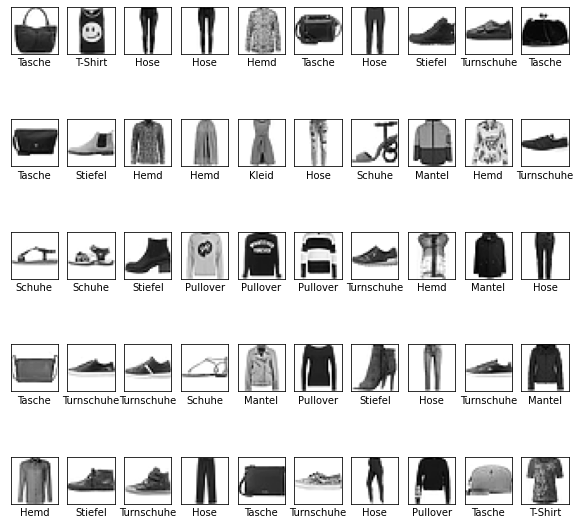

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(100, 150):
  plt.subplot(5, 10, i-100+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i]])

In [ ]:
# Dimensionstransformation
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
# Datennormalisierung
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Tags in Kategorien umwandeln
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
# Das Model erstellen
model = Sequential()
# Eingangsschichte 
model.add(Dense(800, input_dim=784, activation='relu'))
# Versteckte schichte 
model.add(Dense(700, activation='relu'))
# Ausgangsschichte - 10 Neurons für 10 Klassen
model.add(Dense(10, activation='softmax'))

In [ ]:
# Das Model kompilieren und seine Eigenschaften ausgeben
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 700)               560700    
                                                                 
 dense_2 (Dense)             (None, 10)                7010      
                                                                 
Total params: 1,195,710
Trainable params: 1,195,710
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Start Zeitpunkt - um festzustellen, wie lange das Lernen dauert
start_time = datetime.now()

In [ ]:
# Lernen - batch_size, epochs, validation_split werden beim Lernen angepasst, um möglichst besseres Ergebnis zu bekommen
model.fit(x_train,
          y_train,
          batch_size=30,
          epochs=100,
          validation_split=0.2,
          verbose=1)

Epoch 1/100
1600/1600 [==============================] - 11s 5ms/step - loss: 0.6954 - accuracy: 0.7755 - val_loss: 0.5101 - val_accuracy: 0.8238
Epoch 2/100
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4820 - accuracy: 0.8330 - val_loss: 0.4603 - val_accuracy: 0.8397
Epoch 3/100
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8470 - val_loss: 0.4268 - val_accuracy: 0.8474
Epoch 4/100
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4099 - accuracy: 0.8566 - val_loss: 0.4082 - val_accuracy: 0.8570
Epoch 5/100
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3896 - accuracy: 0.8625 - val_loss: 0.3889 - val_accuracy: 0.8628
Epoch 6/100
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8685 - val_loss: 0.3792 - val_accuracy: 0.8689
Epoch 7/100
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3586 - accuracy: 0.8736 - val_loss: 0.3705 - val_a

In [ ]:
# Ende Zeitpunkt - um festzustellen, wie lange das Lernen dauert
end_time = datetime.now()
time = end_time - start_time
print("Startzeit: ", start_time)
print("Endzeit: ", end_time)
print("Dauer: ", time)

Startzeit:  2022-11-21 08:36:11.528812
Endzeit:  2022-11-21 08:44:36.487118
Dauer:  0:08:24.958306


In [ ]:
# Ergebnis
predictions = model.predict(x_train)  
# Qualität
scores = model.evaluate(x_test, y_test, verbose=1)
# Ausgabe in %
print("Anteil der richtigen Antworten, %: ", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 2ms/step - loss: 0.4241 - accuracy: 0.8924
Anteil der richtigen Antworten, %:  89.24


In [ ]:
# Das Model speichern
model.save('fashion_mnist_test.h5')